<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_Complete_Classic_ML_Diff_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score




#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/Processed Combined Final Dataset.csv'
heart_attack = pd.DataFrame(pd.read_csv(file_path))
heart_attack


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,Blood Pressure,Cholesterol,Heart Risk,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,40,1,140,289,0,304.342082,1.0,1.0,1.0,1.0,...,5.0,304.342082,304.342082,304.342082,304.342082,5.0,5.0,5.0,5.0,1.0
1,49,0,160,180,1,425.888148,1.0,1.0,1.0,1.0,...,7.0,425.888148,425.888148,425.888148,425.888148,7.0,7.0,7.0,7.0,1.0
2,37,1,130,283,0,299.019353,1.0,1.0,1.0,1.0,...,5.0,299.019353,299.019353,299.019353,299.019353,5.0,5.0,5.0,5.0,1.0
3,48,0,138,214,1,375.511197,1.0,1.0,1.0,1.0,...,5.0,375.511197,375.511197,375.511197,375.511197,5.0,5.0,5.0,5.0,1.0
4,54,1,150,195,0,408.567916,1.0,1.0,1.0,1.0,...,5.0,408.567916,408.567916,408.567916,408.567916,5.0,5.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,57,0,140,241,0,359.405307,1.0,1.0,1.0,1.0,...,5.0,359.405307,359.405307,359.405307,359.405307,5.0,5.0,5.0,5.0,1.0
9980,45,1,110,264,0,305.123156,-1.0,-1.0,-1.0,-1.0,...,5.0,305.123156,305.123156,305.123156,305.123156,5.0,5.0,5.0,5.0,-1.0
9981,68,1,144,193,0,415.657352,1.0,1.0,1.0,1.0,...,5.0,415.657352,415.657352,415.657352,415.657352,5.0,5.0,5.0,5.0,1.0
9982,57,1,130,131,0,451.788161,1.0,1.0,1.0,1.0,...,5.0,451.788161,451.788161,451.788161,451.788161,5.0,5.0,5.0,5.0,1.0


In [40]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailan' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealan' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})

heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)


mode_columns = ['Stress Level','Medication Use', 'Previous Heart Problems', 'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country']

mean_columns = ['Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day']

median_columns = ['Heart Rate', 'Income', 'Triglycerides']




unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)


# Check for NaN values in columns after fillna operations
columns_with_nulls = heart_attack.columns[heart_attack.isnull().any()].tolist()
print("Columns with NaN values after fillna operations:")
print(columns_with_nulls)

heart_attack.head()


[nan]
[nan]
[nan]
[nan]
[nan]
Columns with NaN values after fillna operations:
['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']


,Age,Sex,Blood Pressure,Cholesterol,Heart Risk,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,40,NaN,140,289,0,304.342082,1.0,1.0,1.0,1.0,...,5.0,304.342082,304.342082,304.342082,304.342082,5.0,5.0,NaN,NaN,NaN
1,49,NaN,160,180,1,425.888148,1.0,1.0,1.0,1.0,...,7.0,425.888148,425.888148,425.888148,425.888148,7.0,7.0,NaN,NaN,NaN
2,37,NaN,130,283,0,299.019353,1.0,1.0,1.0,1.0,...,5.0,299.019353,299.019353,299.019353,299.019353,5.0,5.0,NaN,NaN,NaN
3,48,NaN,138,214,1,375.511197,1.0,1.0,1.0,1.0,...,5.0,375.511197,375.511197,375.511197,375.511197,5.0,5.0,NaN,NaN,NaN
4,54,NaN,150,195,0,408.567916,1.0,1.0,1.0,1.0,...,5.0,408.567916,408.567916,408.567916,408.567916,5.0,5.0,NaN,NaN,NaN


In [41]:

# Extract features and target
X = heart_attack[['Sex', 'Age', 'Blood Pressure','Country','Stress Level','Medication Use', 'Previous Heart Problems', 'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country','Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day','Income', 'Triglycerides']].values
y = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Add intercept term to features
X_scaled = np.hstack((np.ones((len(y), 1)), X_scaled))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize parameters
theta = np.zeros((X_scaled.shape[1], 1))
alpha = 0.0001
iterations = 1000

# Linear regression hypothesis function
def linear(X, theta):
    return X @ theta

# Cost function for linear regression
def linear_cost_function(X, y, theta):
    m = len(y)
    h = linear(X, theta)
    cost = (1 / (2 * m)) * np.sum((h - y)**2)
    return cost

# Gradient descent for linear regression
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = linear(X, theta)
        gradient = X.T @ (h - y) / m
        theta -= alpha * gradient
        costs.append(linear_cost_function(X, y, theta))

    return theta, costs

# Perform gradient descent
theta, costs = gradient_descent(X_train, y_train, theta, alpha, iterations)


In [42]:

# Extract features and target
X_linear = heart_attack[['Sex', 'Age', 'Blood Pressure','Country','Stress Level','Medication Use', 'Previous Heart Problems', 'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country','Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day']].values
y_linear = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_linear = imputer.fit_transform(X_linear)

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_linear, y_linear)

# Get predictions
y_linear_pred = linear_model.predict(X_linear)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)


print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')


Linear Regression Metrics:
Mean Squared Error (MSE): 0.23
R-squared (R2): 0.02


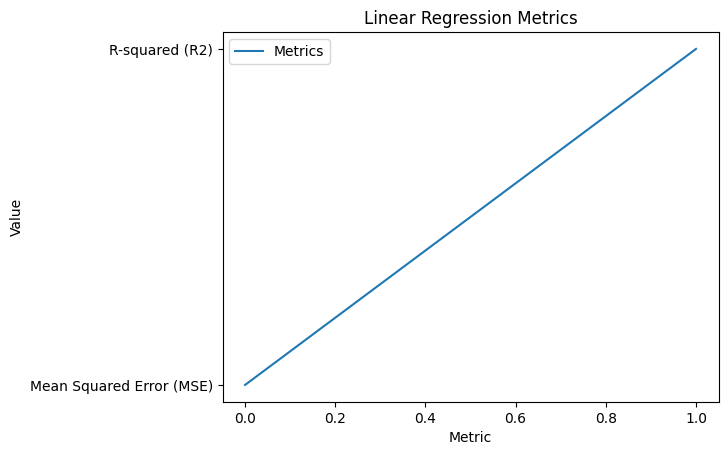

In [43]:
# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)

# Plotting data
fig, ax = plt.subplots()
ax.plot(['Mean Squared Error (MSE)', 'R-squared (R2)'])

ax.legend(['Metrics'])
ax.set_title('Linear Regression Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

plt.show()

In [44]:
# Extract features and target
X = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country', 'Stress Level', 'Medication Use', 'Previous Heart Problems',
                  'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                  'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country', 'Exercise Hours Per Week',
                  'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day']].values
y = heart_attack['Heart Risk']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred = logreg_model.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix for Logistic Regression:')



Logistic Regression Metrics:
Accuracy: 0.64
Precision: 0.60
Recall: 0.17
F1 Score: 0.26

Confusion Matrix for Logistic Regression:


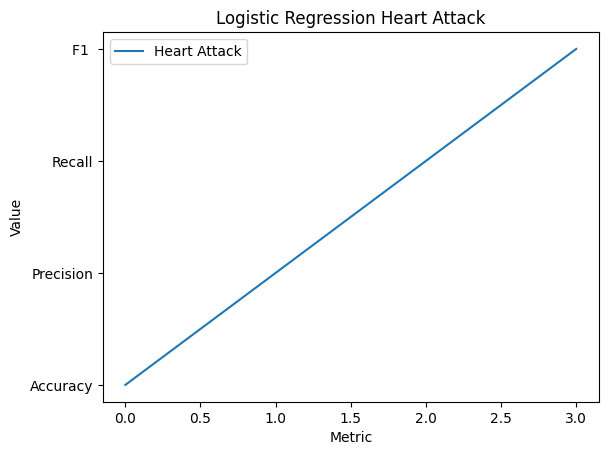

In [45]:
# Plotting data
fig, ax = plt.subplots()
ax.plot(['Accuracy', 'Precision', 'Recall', 'F1 '])

ax.legend(['Heart Attack'])
ax.set_title('Logistic Regression Heart Attack')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

plt.show()

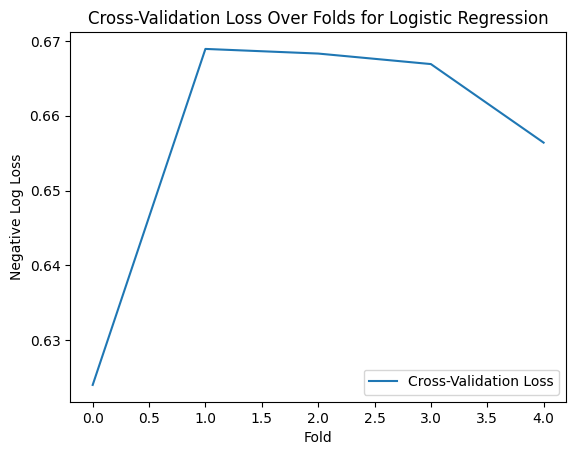

In [46]:
# Define logistic regression model
logreg_model = LogisticRegression(random_state=0)

# Use cross-validation to get training and validation loss
cross_val_loss = -cross_val_score(logreg_model, X_scaled, y, cv=5, scoring='neg_log_loss')

# Plot the training and validation loss
plt.plot(cross_val_loss, label="Cross-Validation Loss")
plt.xlabel("Fold")
plt.ylabel("Negative Log Loss")
plt.legend()
plt.title("Cross-Validation Loss Over Folds for Logistic Regression")
plt.show()

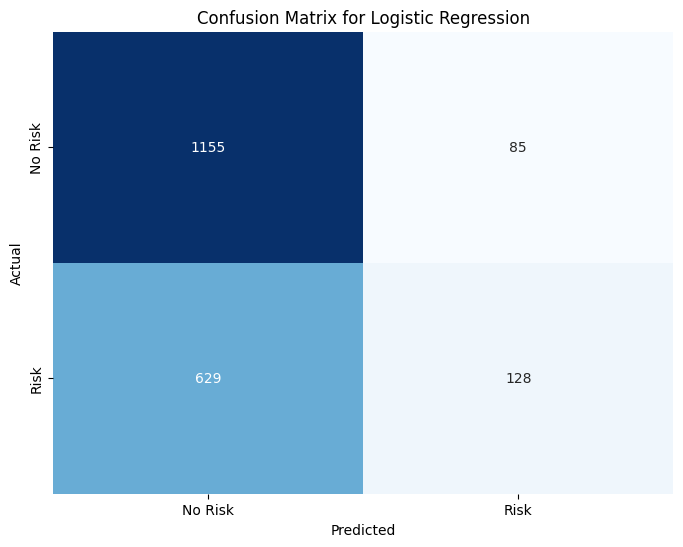

In [47]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
# Extract features and target for Gaussian Naive Bayes
X_nb = heart_attack[['Sex', 'Age', 'Blood Pressure','Country','Stress Level','Medication Use', 'Previous Heart Problems',
                     'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country','Exercise Hours Per Week',
                     'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day']].values
y_nb = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Handle missing values for Gaussian Naive Bayes
imputer_nb = SimpleImputer(strategy='mean')
X_nb = imputer_nb.fit_transform(X_nb)

# Split the data into training and testing sets for Gaussian Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=0)


# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_nb, y_train_nb)

# Predictions for Gaussian Naive Bayes
y_nb_pred = nb_model.predict(X_test_nb)

# Calculate metrics for Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test_nb, y_nb_pred)
nb_precision = precision_score(y_test_nb, y_nb_pred)
nb_recall = recall_score(y_test_nb, y_nb_pred)
nb_f1 = f1_score(y_test_nb, y_nb_pred)

# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test_nb, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')
print(nb_conf_matrix)




Gaussian Naive Bayes Metrics:
Accuracy: 0.64
Precision: 0.60
Recall: 0.18
F1 Score: 0.27

Confusion Matrix for Gaussian Naive Bayes:
[[1149   91]
 [ 623  134]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Plotting data
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot Confusion Matrix as a heatmap
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'], ax=axs[1])
axs[1].set_title('Confusion Matrix for Gaussian Naive Bayes')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


Gaussian Naive Bayes Metrics:
Accuracy: 0.64
Precision: 0.60
Recall: 0.18
F1 Score: 0.27

Confusion Matrix for Gaussian Naive Bayes:
[[1149   91]
 [ 623  134]]


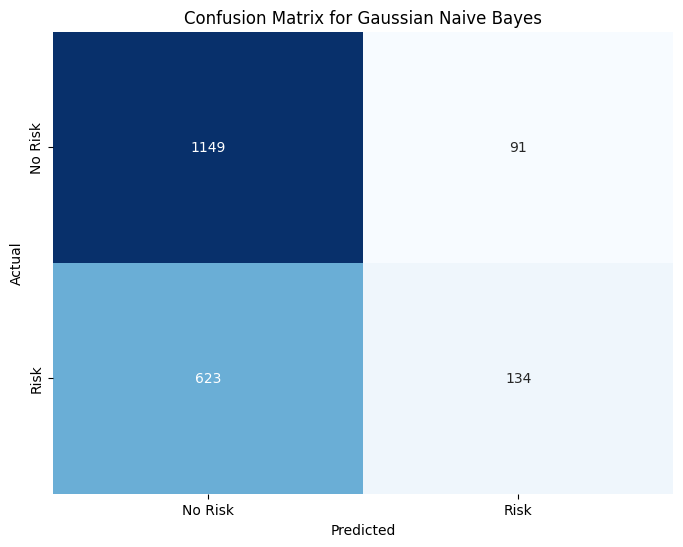

In [50]:
# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test_nb, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')
print(nb_conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()